In [1]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

file="time"
traindir="datasets/binary_train"
testdir="datasets/binary_test"


Using TensorFlow backend.


In [2]:
# load the dataset
traindata = pd.read_csv(f"{traindir}/processed/{file}.csv")
testdata = pd.read_csv(f"{testdir}/processed/{file}.csv")
n=len(traindata.count())
n

10

In [3]:
# split into input (X) and output (y) variables
X = traindata.iloc[:,0:n-1]
y = traindata.iloc[:,n-1]
X_test = testdata.iloc[:,0:n-1]
y_test = testdata.iloc[:,n-1]

In [4]:
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=n-1, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:

# compile the keras model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:

# fit the keras model on the dataset
history = model.fit(X, y, epochs=100, batch_size=5000,validation_split=0.2)


Train on 100778 samples, validate on 25195 samples
Epoch 1/100
100778/100778 [==============================] - 0s 5us/step - loss: 0.9761 - accuracy: 0.7448 - val_loss: 0.4024 - val_accuracy: 0.8694
Epoch 2/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3991 - accuracy: 0.8751 - val_loss: 0.3651 - val_accuracy: 0.8840
Epoch 3/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3496 - accuracy: 0.8797 - val_loss: 0.3279 - val_accuracy: 0.8810
Epoch 4/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3134 - accuracy: 0.8873 - val_loss: 0.2975 - val_accuracy: 0.8975
Epoch 5/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.2867 - accuracy: 0.8985 - val_loss: 0.2745 - val_accuracy: 0.9004
Epoch 6/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.2628 - accuracy: 0.9065 - val_loss: 0.2627 - val_accuracy: 0.8946
Epoch 7/100
100778/100778 [============================

100778/100778 [==============================] - 0s 2us/step - loss: 0.1874 - accuracy: 0.9283 - val_loss: 0.1825 - val_accuracy: 0.9317
Epoch 56/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.1837 - accuracy: 0.9301 - val_loss: 0.1864 - val_accuracy: 0.9271
Epoch 57/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.1829 - accuracy: 0.9304 - val_loss: 0.1862 - val_accuracy: 0.9273
Epoch 58/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.1811 - accuracy: 0.9322 - val_loss: 0.1826 - val_accuracy: 0.9325
Epoch 59/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.1810 - accuracy: 0.9319 - val_loss: 0.1910 - val_accuracy: 0.9239
Epoch 60/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.1906 - accuracy: 0.9261 - val_loss: 0.1821 - val_accuracy: 0.9310
Epoch 61/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.1859 - accuracy: 0.9270 - val

In [7]:

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

22542/22542 [==============================] - 0s 12us/step
Accuracy: 73.17


In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
prediction=model.predict_classes(X_test)
m=confusion_matrix(y_test,prediction)
m

array([[9185,  525],
       [5524, 7308]], dtype=int64)

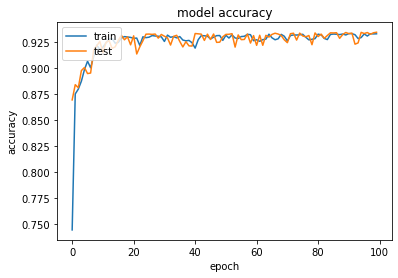

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:

# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]
print(rounded[1] )

0.0
